# Walget Pregnancy Prediction Model

Brandon, Sumeet, Elizabeth 

In [1]:
import os

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 18)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)
import seaborn as sns
from sklearn import linear_model

from sklearn import preprocessing, neighbors, grid_search, cross_validation

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('dataset-12-walget-train.csv')

# Data Exploration

In [3]:
df.head()

,AccountHolderImpliedGender,AccountHolderAddress,RecentlyPurchasedPregnancyTest,RecentlyPurchasedBirthControl,RecentlyPurchasedFeminineHygieneProducts,...,RecentlyPurchasedSmokingCessationProducts,PurchasedWineRegularlyUntilRecentlyThenStopped,RecentlyPurchasedWine,RecentlyPurchasedMaternityClothing,IsPregnant
0,Female,Apartment,False,True,False,...,False,False,False,False,False
1,Male,Apartment,False,False,True,...,False,False,True,False,False
2,Male,Apartment,False,False,False,...,False,False,False,False,False
3,Male,Apartment,False,False,False,...,False,False,True,False,False
4,Male,Apartment,False,False,True,...,False,False,False,False,False


In [4]:
len(df)

600

In [5]:
df.columns

Index([u'AccountHolderImpliedGender', u'AccountHolderAddress',
       u'RecentlyPurchasedPregnancyTest', u'RecentlyPurchasedBirthControl',
       u'RecentlyPurchasedFeminineHygieneProducts',
       u'RecentlyPurchasedFolicAcidSupplements',
       u'RecentlyPurchasedPrenatalVitamins',
       u'RecentlyPurchasedPrenatalYogaDVD', u'RecentlyPurchasedBodyPillow',
       u'RecentlyPurchasedGingerAle', u'RecentlyPurchasedSeaBands',
       u'PurchasedCigarettesRegularlyUntilRecentlyThenStopped',
       u'RecentlyPurchasedCigarettes',
       u'RecentlyPurchasedSmokingCessationProducts',
       u'PurchasedWineRegularlyUntilRecentlyThenStopped',
       u'RecentlyPurchasedWine', u'RecentlyPurchasedMaternityClothing',
       u'IsPregnant'],
      dtype='object')

In [6]:
df.AccountHolderAddress.unique()

array(['Apartment', 'Home', 'PO Box', nan], dtype=object)

In [7]:
df.isnull().sum()

AccountHolderImpliedGender                              58
AccountHolderAddress                                     6
RecentlyPurchasedPregnancyTest                           6
RecentlyPurchasedBirthControl                            7
RecentlyPurchasedFeminineHygieneProducts                10
RecentlyPurchasedFolicAcidSupplements                    1
RecentlyPurchasedPrenatalVitamins                        6
RecentlyPurchasedPrenatalYogaDVD                         6
RecentlyPurchasedBodyPillow                              9
RecentlyPurchasedGingerAle                               6
RecentlyPurchasedSeaBands                               11
PurchasedCigarettesRegularlyUntilRecentlyThenStopped     5
RecentlyPurchasedCigarettes                              9
RecentlyPurchasedSmokingCessationProducts               12
PurchasedWineRegularlyUntilRecentlyThenStopped          12
RecentlyPurchasedWine                                    8
RecentlyPurchasedMaternityClothing                      

### Don't want true and false, want 1 and 0 for variables instead

In [8]:
df.AccountHolderImpliedGender.value_counts()

Female    301
Male      241
Name: AccountHolderImpliedGender, dtype: int64

In [9]:
df.AccountHolderImpliedGender_Male = \
    df.AccountHolderImpliedGender.map(lambda x: 1 if x =='Male' else 0, na_action='ignore')

In [10]:
df.AccountHolderImpliedGender_Male.value_counts()

0.0    301
1.0    241
Name: AccountHolderImpliedGender, dtype: int64

In [11]:
# To see which of each value is the default (thus should be dropped)
for name in df.columns:
    print df[name].value_counts()

Female    301
Male      241
Name: AccountHolderImpliedGender, dtype: int64
Home         295
Apartment    243
PO Box        56
Name: AccountHolderAddress, dtype: int64
False    549
True      45
Name: RecentlyPurchasedPregnancyTest, dtype: int64
False    516
True      77
Name: RecentlyPurchasedBirthControl, dtype: int64
False    502
True      88
Name: RecentlyPurchasedFeminineHygieneProducts, dtype: int64
False    533
True      66
Name: RecentlyPurchasedFolicAcidSupplements, dtype: int64
False    512
True      82
Name: RecentlyPurchasedPrenatalVitamins, dtype: int64
False    582
True      12
Name: RecentlyPurchasedPrenatalYogaDVD, dtype: int64
False    582
True       9
Name: RecentlyPurchasedBodyPillow, dtype: int64
False    558
True      36
Name: RecentlyPurchasedGingerAle, dtype: int64
False    569
True      20
Name: RecentlyPurchasedSeaBands, dtype: int64
False    538
True      57
Name: PurchasedCigarettesRegularlyUntilRecentlyThenStopped, dtype: int64
False    525
True      66
Name: 

Looks like the False is the most common value for each, we should drop the falses. 

In [12]:
df.columns

Index([u'AccountHolderImpliedGender', u'AccountHolderAddress',
       u'RecentlyPurchasedPregnancyTest', u'RecentlyPurchasedBirthControl',
       u'RecentlyPurchasedFeminineHygieneProducts',
       u'RecentlyPurchasedFolicAcidSupplements',
       u'RecentlyPurchasedPrenatalVitamins',
       u'RecentlyPurchasedPrenatalYogaDVD', u'RecentlyPurchasedBodyPillow',
       u'RecentlyPurchasedGingerAle', u'RecentlyPurchasedSeaBands',
       u'PurchasedCigarettesRegularlyUntilRecentlyThenStopped',
       u'RecentlyPurchasedCigarettes',
       u'RecentlyPurchasedSmokingCessationProducts',
       u'PurchasedWineRegularlyUntilRecentlyThenStopped',
       u'RecentlyPurchasedWine', u'RecentlyPurchasedMaternityClothing',
       u'IsPregnant'],
      dtype='object')

# Read in the data again and begin making the model and really cleaning the data

In [13]:
df = pd.read_csv('dataset-12-walget-train.csv')

In [14]:
def clean_df_features(df):
    
#     df.dropna(subset = ['AccountHolderAddress','RecentlyPurchasedPregnancyTest','RecentlyPurchasedBirthControl',
#  'RecentlyPurchasedFeminineHygieneProducts','RecentlyPurchasedFolicAcidSupplements','RecentlyPurchasedPrenatalVitamins',
#  'RecentlyPurchasedPrenatalYogaDVD',
#  'RecentlyPurchasedBodyPillow',
#  'RecentlyPurchasedGingerAle',
#  'RecentlyPurchasedSeaBands',
#  'PurchasedCigarettesRegularlyUntilRecentlyThenStopped',
#  'RecentlyPurchasedCigarettes',
#  'RecentlyPurchasedSmokingCessationProducts',
#  'PurchasedWineRegularlyUntilRecentlyThenStopped',
#  'RecentlyPurchasedWine',
#  'RecentlyPurchasedMaternityClothing',
#  'IsPregnant'],inplace=True)
    
    df_AccountHolderImpliedGender = pd.get_dummies(df.AccountHolderImpliedGender,dummy_na=True, prefix = 'pGen')
    df_AccountHolderAddress = pd.get_dummies(df.AccountHolderAddress, prefix = 'PAddress')
    df_RecentlyPurchasedPregnancyTest = pd.get_dummies(df.RecentlyPurchasedPregnancyTest, prefix = 'PPregTest')
    df_RecentlyPurchasedBirthControl = pd.get_dummies(df.RecentlyPurchasedBirthControl, prefix = 'PBirthC')
    df_RecentlyPurchasedFeminineHygieneProducts = pd.get_dummies(df.RecentlyPurchasedFeminineHygieneProducts, prefix = 'pHygiene')
    df_RecentlyPurchasedFolicAcidSupplements = pd.get_dummies(df.RecentlyPurchasedFolicAcidSupplements, prefix = 'PFolic')
    df_RecentlyPurchasedPrenatalYogaDVD = pd.get_dummies(df.RecentlyPurchasedPrenatalYogaDVD,prefix='PYogaDVD')
    df_RecentlyPurchasedPrenatalVitamins = pd.get_dummies(df.RecentlyPurchasedPrenatalVitamins,prefix='PVitamins')
    df_RecentlyPurchasedGingerAle = pd.get_dummies(df.RecentlyPurchasedGingerAle,prefix='PGingerAle')
    df_RecentlyPurchasedBodyPillow = pd.get_dummies(df.RecentlyPurchasedBodyPillow, prefix='PPillow')
    df_RecentlyPurchasedSeaBands = pd.get_dummies(df.RecentlyPurchasedSeaBands,prefix='PSeaBands')
    df_PurchasedCigarettesRegularlyUntilRecentlyThenStopped = \
        pd.get_dummies(df.PurchasedCigarettesRegularlyUntilRecentlyThenStopped,prefix='PStoppedCigarettes')
    df_RecentlyPurchasedCigarettes = pd.get_dummies(df.RecentlyPurchasedCigarettes,prefix='PCigarettes')
    df_RecentlyPurchasedSmokingCessationProducts = pd.get_dummies(df.RecentlyPurchasedSmokingCessationProducts,prefix='PCessation')
    df_PurchasedWineRegularlyUntilRecentlyThenStopped = pd.get_dummies(df.PurchasedWineRegularlyUntilRecentlyThenStopped,'PStoppedWine')
    df_RecentlyPurchasedWine = pd.get_dummies(df.RecentlyPurchasedWine,prefix='PWine')
    df_RecentlyPurchasedMaternityClothing = pd.get_dummies(df.RecentlyPurchasedMaternityClothing,prefix='PMaternity')
    df_IsPregnant = pd.get_dummies(df.IsPregnant, prefix='PPregnant')
    
    
    # joins
    df_dummies = df_AccountHolderImpliedGender.join(df_RecentlyPurchasedPregnancyTest)
    df_dummies = df_dummies.join(df_AccountHolderAddress)
    df_dummies = df_dummies.join(df_RecentlyPurchasedBirthControl)
    df_dummies = df_dummies.join(df_RecentlyPurchasedFeminineHygieneProducts)
    df_dummies = df_dummies.join(df_RecentlyPurchasedFolicAcidSupplements)
    df_dummies = df_dummies.join(df_RecentlyPurchasedPrenatalYogaDVD)
    df_dummies = df_dummies.join(df_RecentlyPurchasedBodyPillow)
    df_dummies = df_dummies.join(df_RecentlyPurchasedGingerAle)
    df_dummies = df_dummies.join(df_RecentlyPurchasedSeaBands)
    df_dummies = df_dummies.join(df_PurchasedCigarettesRegularlyUntilRecentlyThenStopped)
    df_dummies = df_dummies.join(df_RecentlyPurchasedCigarettes)
    df_dummies = df_dummies.join(df_RecentlyPurchasedSmokingCessationProducts)
    df_dummies = df_dummies.join(df_PurchasedWineRegularlyUntilRecentlyThenStopped)
    df_dummies = df_dummies.join(df_RecentlyPurchasedWine)
    df_dummies = df_dummies.join(df_RecentlyPurchasedMaternityClothing)
    df_dummies = df_dummies.join(df_IsPregnant)
    df_dummies['Folic_acid*Maternity_clothes'] = df_dummies['PMaternity_True'] * df_dummies['PFolic_True']
    df_dummies['RecentCigs*RecentWine'] = df_dummies['PStoppedCigarettes_True'] * df_dummies['PStoppedWine_True']
    df_dummies.drop(['PPregTest_False','PBirthC_False','pHygiene_False','PFolic_False','PYogaDVD_False',
         'PPillow_False','PGingerAle_False','PSeaBands_False','PStoppedCigarettes_False','PCigarettes_False',
             'PCessation_False','PStoppedWine_False','PWine_False','PMaternity_False','PPregnant_False',
                     'PAddress_Home','pGen_Female'], 
                    axis = 1, inplace = True)
    
    print(df_dummies.columns)
    return df_dummies

In [15]:
df_clean = clean_df_features(df)

Index([u'pGen_Male', u'pGen_nan', u'PPregTest_True', u'PAddress_Apartment',
       u'PAddress_PO Box', u'PBirthC_True', u'pHygiene_True', u'PFolic_True',
       u'PYogaDVD_True', u'PPillow_True', u'PGingerAle_True',
       u'PSeaBands_True', u'PStoppedCigarettes_True', u'PCigarettes_True',
       u'PCessation_True', u'PStoppedWine_True', u'PWine_True',
       u'PMaternity_True', u'PPregnant_True', u'Folic_acid*Maternity_clothes',
       u'RecentCigs*RecentWine'],
      dtype='object')


In [16]:
df_clean.columns.tolist()

['pGen_Male',
 'pGen_nan',
 'PPregTest_True',
 'PAddress_Apartment',
 'PAddress_PO Box',
 'PBirthC_True',
 'pHygiene_True',
 'PFolic_True',
 'PYogaDVD_True',
 'PPillow_True',
 'PGingerAle_True',
 'PSeaBands_True',
 'PStoppedCigarettes_True',
 'PCigarettes_True',
 'PCessation_True',
 'PStoppedWine_True',
 'PWine_True',
 'PMaternity_True',
 'PPregnant_True',
 'Folic_acid*Maternity_clothes',
 'RecentCigs*RecentWine']

## More EDA with numerical data now

In [17]:
df_clean.mean()

pGen_Male                       0.401667
pGen_nan                        0.096667
PPregTest_True                  0.075000
PAddress_Apartment              0.405000
PAddress_PO Box                 0.093333
PBirthC_True                    0.128333
pHygiene_True                   0.146667
PFolic_True                     0.110000
PYogaDVD_True                   0.020000
                                  ...   
PStoppedCigarettes_True         0.095000
PCigarettes_True                0.110000
PCessation_True                 0.063333
PStoppedWine_True               0.130000
PWine_True                      0.106667
PMaternity_True                 0.130000
PPregnant_True                  0.500000
Folic_acid*Maternity_clothes    0.020000
RecentCigs*RecentWine           0.020000
dtype: float64

In [18]:
df_clean.corr()

,pGen_Male,pGen_nan,PPregTest_True,PAddress_Apartment,PAddress_PO Box,...,PWine_True,PMaternity_True,PPregnant_True,Folic_acid*Maternity_clothes,RecentCigs*RecentWine
pGen_Male,1.000000,-0.268025,-0.013876,0.030438,-2.913952e-02,...,0.058298,-0.033663,-1.189905e-01,0.077222,-0.019913
pGen_nan,-0.268025,1.000000,0.035332,-0.005630,-2.740241e-02,...,-0.021682,-0.042598,3.384057e-02,-0.046732,-0.006446
PPregTest_True,-0.013876,0.035332,1.000000,-0.054461,-2.610275e-02,...,-0.077895,0.078084,2.341256e-01,0.094916,0.140114
PAddress_Apartment,0.030438,-0.005630,-0.054461,1.000000,-2.647059e-01,...,0.000880,-0.005956,-9.166985e-02,-0.045107,0.003395
PAddress_PO Box,-0.029140,-0.027402,-0.026103,-0.264706,1.000000e+00,...,0.019055,-0.072915,1.270585e-16,0.036013,-0.045835
PBirthC_True,0.092212,-0.007476,-0.052501,0.059029,8.245320e-02,...,0.077271,-0.103870,-3.139383e-01,-0.054815,-0.054815
pHygiene_True,0.035108,-0.024020,-0.082277,0.041843,-5.204000e-02,...,0.039884,-0.048189,-2.544002e-01,-0.059225,-0.059225
PFolic_True,-0.005541,0.029202,0.102129,-0.073028,7.031475e-02,...,-0.086969,0.054169,3.515615e-01,0.406350,-0.050223
PYogaDVD_True,0.004371,-0.046732,0.004520,0.027646,-4.583492e-02,...,-0.010798,0.050974,1.190476e-01,0.064626,-0.020408
...,...,...,...,...,...,...,...,...,...,...,...


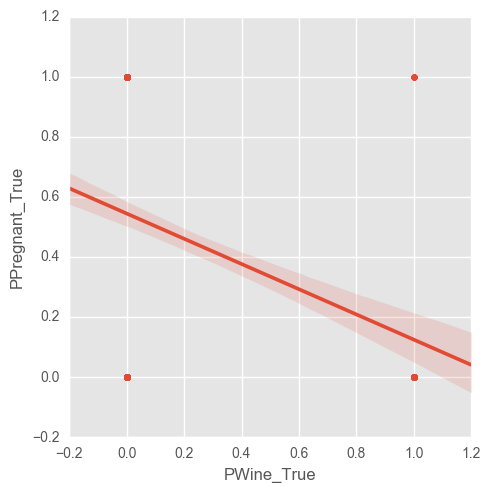

In [19]:
g = sns.lmplot(x='PWine_True',y='PPregnant_True',data=df_clean)

## Test/Train Split

In [20]:
train_df = df_clean.sample(frac = .5, random_state = 0).sort_index()
test_df = df_clean.drop(train_df.index)

# Logistic Regression

For this model, we removed sample rows where account holder purchased pregnancy test as well as folic acid and maternity clothes. Our rationale to drop was because these features were popular/had high coefficients. This led to lower accuracy score

In [21]:
X = train_df.drop(['PPregnant_True','RecentCigs*RecentWine'],axis=1,inplace=False)
c = train_df.PPregnant_True

model = linear_model.LogisticRegression().\
    fit(X, c)

In [22]:
model.score(X, c)

0.80333333333333334

In [23]:
c_hat = model.predict(X)

pd.crosstab(c_hat,
    c,
    rownames = ['Hypothesized Pregnancy'],
    colnames = ['True Pregnancy'])

True Pregnancy,0.0,1.0
Hypothesized Pregnancy,,
0.0,128,42
1.0,17,113


In [24]:
sorted(zip(np.exp(model.coef_[0]) - 1,X.columns))

[(-0.81773638289595829, 'PBirthC_True'),
 (-0.70536504090601815, 'pHygiene_True'),
 (-0.70493979133131834, 'PWine_True'),
 (-0.6941000012506835, 'PCigarettes_True'),
 (-0.27812328337348569, 'PAddress_Apartment'),
 (-0.1781764361196404, 'pGen_Male'),
 (-0.0032939750159977077, 'PPillow_True'),
 (0.090454868698584434, 'Folic_acid*Maternity_clothes'),
 (0.35809918830272847, 'PAddress_PO Box'),
 (0.50916880560488753, 'PStoppedCigarettes_True'),
 (0.94731751669562203, 'pGen_nan'),
 (1.4817143574968332, 'PYogaDVD_True'),
 (1.489274450849766, 'PCessation_True'),
 (1.9025093227341912, 'PSeaBands_True'),
 (2.0268494243991086, 'PGingerAle_True'),
 (2.9924456166343991, 'PPregTest_True'),
 (3.3684034184146441, 'PStoppedWine_True'),
 (4.3176196580750794, 'PMaternity_True'),
 (11.211624710171384, 'PFolic_True')]

Having recently purchased a body pillow doesn't seem to have helped our model, so we will drop that feature. 

## Linear Model #2 

In [25]:
#Including the engineered feature we had the same Model score of 0.826

In [26]:
X = train_df.drop(['PPregnant_True','PPillow_True'],axis=1,inplace=False)
c = train_df.PPregnant_True

X_test = test_df.drop(['PPregnant_True','PPillow_True'],axis=1,inplace=False)
c_test = test_df.PPregnant_True

model = linear_model.LogisticRegression().\
    fit(X, c)

In [27]:
model.score(X, c)

0.80333333333333334

In [28]:
model.score(X_test, c_test)

0.81000000000000005

In [29]:
c_hat = model.predict(X)

pd.crosstab(c_hat,
    c,
    rownames = ['Hypothesized Pregnancy'],
    colnames = ['True Pregnancy'])

True Pregnancy,0.0,1.0
Hypothesized Pregnancy,,
0.0,128,42
1.0,17,113


In [30]:
sorted(zip(np.exp(model.coef_[0]) - 1,X.columns))

[(-0.81771303017859154, 'PBirthC_True'),
 (-0.70502997647496646, 'pHygiene_True'),
 (-0.70481038433412779, 'PWine_True'),
 (-0.69373752204305095, 'PCigarettes_True'),
 (-0.27847353269762487, 'PAddress_Apartment'),
 (-0.17664931498791436, 'pGen_Male'),
 (0.089997025283479637, 'Folic_acid*Maternity_clothes'),
 (0.30987497514500451, 'RecentCigs*RecentWine'),
 (0.35939409512829146, 'PAddress_PO Box'),
 (0.48983840061154904, 'PStoppedCigarettes_True'),
 (0.94965744486700276, 'pGen_nan'),
 (1.480973705436853, 'PYogaDVD_True'),
 (1.4945384298162345, 'PCessation_True'),
 (1.9002788530838486, 'PSeaBands_True'),
 (2.0268236976968148, 'PGingerAle_True'),
 (2.987874493728826, 'PPregTest_True'),
 (3.3115939191505683, 'PStoppedWine_True'),
 (4.3145662129614903, 'PMaternity_True'),
 (11.216469081726594, 'PFolic_True')]

# Top 4? 

In [31]:
#We then tried to limit the model to the top 4 most impactful variables and saw a lower score

In [32]:
x_list = ['PFolic_True','PMaternity_True','PStoppedWine_True','PPregTest_True']
X = train_df[x_list]
c = train_df.PPregnant_True

model = linear_model.LogisticRegression().\
    fit(X, c)

In [33]:
model.score(X, c)

0.7466666666666667

In [34]:
c_hat = model.predict(X)

pd.crosstab(c_hat,
    c,
    rownames = ['Hypothesized Pregnancy'],
    colnames = ['True Pregnancy'])

True Pregnancy,0.0,1.0
Hypothesized Pregnancy,,
0.0,134,65
1.0,11,90


# Top 8? (Including top 4 negative and top 4 positive)

In [35]:
x_list = ['PFolic_True','PMaternity_True','PStoppedWine_True','PPregTest_True',
          'PBirthC_True','pHygiene_True','PWine_True','PCigarettes_True']
X = train_df[x_list]
c = train_df.PPregnant_True

model = linear_model.LogisticRegression().\
    fit(X, c)

In [36]:
model.score(X, c)

0.76000000000000001

In [37]:
c_hat = model.predict(X)

pd.crosstab(c_hat,
    c,
    rownames = ['Hypothesized Pregnancy'],
    colnames = ['True Pregnancy'])

True Pregnancy,0.0,1.0
Hypothesized Pregnancy,,
0.0,84,11
1.0,61,144


# Final Model

Using all of the data for the final model in order to be able to train it with all available data. 

In [38]:
X = df_clean.drop(['PPregnant_True','PPillow_True','Folic_acid*Maternity_clothes'],axis=1,inplace=False)
c = df_clean.PPregnant_True

model = linear_model.LogisticRegression().\
    fit(X, c)

In [39]:
model.score(X, c)

0.81999999999999995

In [40]:
c_hat = model.predict(X)

pd.crosstab(c_hat,
    c,
    rownames = ['Hypothesized Pregnancy'],
    colnames = ['True Pregnancy'])

True Pregnancy,0.0,1.0
Hypothesized Pregnancy,,
0.0,276,84
1.0,24,216


In [41]:
sorted(zip(np.exp(model.coef_[0]) - 1,X.columns))

[(-0.87655016371371974, 'PBirthC_True'),
 (-0.76842598211502045, 'PWine_True'),
 (-0.74085428271122411, 'pHygiene_True'),
 (-0.73166433316852297, 'PCigarettes_True'),
 (-0.29206903667934003, 'pGen_Male'),
 (-0.16422617440760512, 'PAddress_PO Box'),
 (-0.11219491692972483, 'PAddress_Apartment'),
 (0.021147656643149659, 'pGen_nan'),
 (0.46364783846629609, 'RecentCigs*RecentWine'),
 (1.2205476768000501, 'PStoppedCigarettes_True'),
 (2.3439234240286138, 'PSeaBands_True'),
 (2.6159772336819063, 'PYogaDVD_True'),
 (2.8423043558336194, 'PGingerAle_True'),
 (3.1183356787107437, 'PStoppedWine_True'),
 (3.9236302326460502, 'PCessation_True'),
 (4.4069818619282985, 'PMaternity_True'),
 (4.7013601394838762, 'PPregTest_True'),
 (24.019496720976896, 'PFolic_True')]